In [1]:
import networkx as nx
from networkx.algorithms import bipartite
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt
from urllib import error, request
from nltk import word_tokenize
import json
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
from PIL import Image
from io import BytesIO
from numba import jit
import math

In [13]:
with open("characterQuotesBySeason.json","r") as f:
    quotesDict = json.loads(f.read())
    

dict_keys(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30'])

In [37]:
#create quote dictionary from filteredQuotes
characterQuotes={}
for season in quotesDict.keys():
    for person in quotesDict[season].keys():
        if not characterQuotes.get(person):
            characterQuotes[person]=''
        characterQuotes[person]+=quotesDict[season][person]

In [38]:
#create documents for tf-idf
documents=[]
characterName=[]
for person in characterQuotes.keys():
    if len(characterQuotes[person])>400:
        quotes=characterQuotes[person]
        quotes=quotes.replace("\n","")
        #strQuotes=" ".join(quotes)
        tokens=word_tokenize(quotes.lower())
        listToks=sorted(tokens)
        documents.append(listToks)
        characterName.append(person)

In [39]:
documents[characterName.index('nelson')]

['17',
 '3month',
 '47',
 '50',
 '50',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'about',
 'about',
 'about',
 'about',
 'about',
 'about',
 'accidents',
 'actually',
 'add',
 'adult',
 'adults',
 'adults',
 'adults',
 'afford',
 'afraid',
 'after',
 'after',
 'after',
 'ah',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'already',
 'also',
 'also',
 'also',
 'always',
 'am',
 'am',
 'am',
 'am',
 'amusement',
 'an',
 'and',
 'and',
 'and',
 'and',
 'and',
 'and',
 'and',
 'and',
 'and',
 'and',
 'and',
 'and',
 'and',
 'and',
 'andcut',
 'anddead',
 'andstop',
 'andy',
 'another',
 'ants',
 'any',
 'any',
 'any',
 'anymore',
 'an

In [40]:
documentsWithUniqueWords = [sorted(set(x.split())) for x in characterQuotes.values() if len(x)>400]
documentsLength = len(documents)

# Calculate the tf-idf of a word
#@jit(cache=True)
def tfIdf(word, text):
    # Count how many documents include the word
    count = 0
    for document in documentsWithUniqueWords:
        if word in document:
            count += 1
    # Calculate the idf of the word
    idf = math.log( documentsLength / count)
    if (text.count(word) / len(text)) * idf >1:
        print(word+" "+(text.count(word) / len(text)) * idf)
    return (text.count(word) / len(text)) * idf


# Calculate and return a string in the way that the wordcloud library wants it, using the tf-idf algorithm
#@jit(cache=True)
def getWorldCloudStringFromADocument(document, documentWithUniqueWords):
    finalWords = []
    for word in documentWithUniqueWords:
        try:
            wordAppearance = tfIdf(word, document)*10000
        except:
            raise
        if wordAppearance > 0:
            for _ in range(round(wordAppearance)):
                finalWords.append(word)
            # finalWords.append(wordAppearance)
    return finalWords

# An array with all the strings for the wordcloud
res = []
resCharacterNames=[]
for documentIndex in range(len(documents)):
    if len(documents[documentIndex])!=0:
        wordList = getWorldCloudStringFromADocument(documents[documentIndex], documentsWithUniqueWords[documentIndex])
        res.append(wordList)
        resCharacterNames.append(characterName[documentIndex])
#set each list as a string for the word cloud
res = [" ".join(text) for text in res ]

['',
 '1 1 2 2 3 3 4 4 5 5 7 8 8 à à',
 'j',
 '4 4 4 4 4 4 4 4 5 5 5 6 6 6 6',
 '1 2 2 3 3 4 4 5 5 6 7 8 8 9 j',
 '1 2 3 4 5 5 6 6 8 é',
 '',
 '',
 '0 0 0 0 2 2 2 2 2 2 2 2 3 3 3 3 3',
 '2 2 3 3 3 3 4 6 9 j',
 '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

In [3]:
# Homer
# homer_coloring = np.array(Image.open('pictures/Homer_Simpson.jpg'))
# wc_homer = WordCloud(background_color="white",
#                      max_words=4000,
#                      mask=homer_coloring,
#                      max_font_size=100,
#                      random_state=42,
#                      contour_color="#000000",
#                      contour_width = 2,
#                      collocations=False)

# #Marge
# marge_coloring = np.array(Image.open('pictures/Marge_Simpson.jpeg'))
# wc_marge = WordCloud(background_color="white",
#                      max_words=4000,
#                      mask=marge_coloring,
#                      max_font_size=100,
#                      collocations = False,
#                      random_state=42)

# #Bart
# bart_coloring = np.array(Image.open('pictures/Bart_Simpson.jpg'))
# wc_bart = WordCloud(background_color="white",
#                     max_words=4000,
#                     mask=bart_coloring,
#                     max_font_size=100,
#                     collocations=False,
#                     random_state=42)

#Lisa
lisa_coloring = np.array(Image.open('pictures/LisaTransparent.png'))
wc_lisa = WordCloud(background_color="white",
                    max_words=4000,
                    mask=lisa_coloring,
                    max_font_size=100,
                    collocations=False,
                    random_state=42)


In [4]:
# wc_homer.generate(res[characterName.index('Homer')])
# wc_marge.generate(res[characterName.index('Marge')])
# wc_bart.generate(res[characterName.index('Bart')])
wc_lisa.generate(res[characterName.index('Lisa')])

In [5]:
print(len(res[characterName.index('Lisa')]))
print(len(res[characterName.index('Homer')]))
print(len(res[characterName.index('Bart')]))
print(len(res[characterName.index('Marge')]))

58799
60690
47814
52528


In [6]:
# image_colors_homer = ImageColorGenerator(homer_coloring)
# image_colors_marge = ImageColorGenerator(marge_coloring)
# image_colors_bart = ImageColorGenerator(bart_coloring)
image_colors_lisa = ImageColorGenerator(lisa_coloring)

(-0.5, 739.5, 1199.5, -0.5)

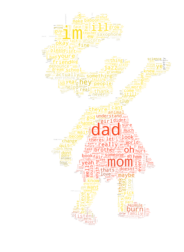

In [9]:
#fig = plt.figure(figsize=(30,30))
plt.imshow(wc_lisa.recolor(color_func=image_colors_lisa),interpolation="bilinear")
plt.savefig("LisaWc.png")
plt.axis("off")